In [1]:
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RVec.hxx"
#include <ROOT/RLogger.hxx>
#include "TCanvas.h"
#include "TFile.h"
#include "TH1D.h"
#include "TF1.h"
#include "TMath.h"
#include "THStack.h"
#include "TLegend.h"
#include "Math/Vector4D.h"

//cpp
#include <vector>
#include <iostream>
#include <fstream>
#include <iomanip>
#include <cstdlib>
#include <cstdio>
#include <string>
#include <Math/GenVector/LorentzVector.h>
#include <Math/GenVector/PtEtaPhiM4D.h>
#include <stdlib.h>
#include <math.h>
#include <TH1.h>

template <typename T> using Vec = ROOT::RVec<T>; 

In [2]:
ROOT::RDataFrame df("Events","/home/pietro/Documents/W3Pi/l1Nano_WTo3Pion_PU200_iso.root");
df.Describe()

(ROOT::RDF::RDFDescription) Dataframe from TChain Events in file /home/pietro/Documents/W3Pi/l1Nano_WTo3Pion_PU200_iso.root

Property                Value
--------                -----
Columns in total           41
Columns from defines        0
Event loops run             0
Processing slots            1

Column                  Type                            Origin
------                  ----                            ------
GenPi_charge            ROOT::VecOps::RVec<Int_t>       Dataset
GenPi_eta               ROOT::VecOps::RVec<Float_t>     Dataset
GenPi_mass              ROOT::VecOps::RVec<Float_t>     Dataset
GenPi_pdgId             ROOT::VecOps::RVec<Int_t>       Dataset
GenPi_phi               ROOT::VecOps::RVec<Float_t>     Dataset
GenPi_prompt            ROOT::VecOps::RVec<Int_t>       Dataset
GenPi_pt                ROOT::VecOps::RVec<Float_t>     Dataset
GenPi_vz                ROOT::VecOps::RVec<Float_t>     Dataset
GenW_charge             ROOT::VecOps::RVec<Int_t>       

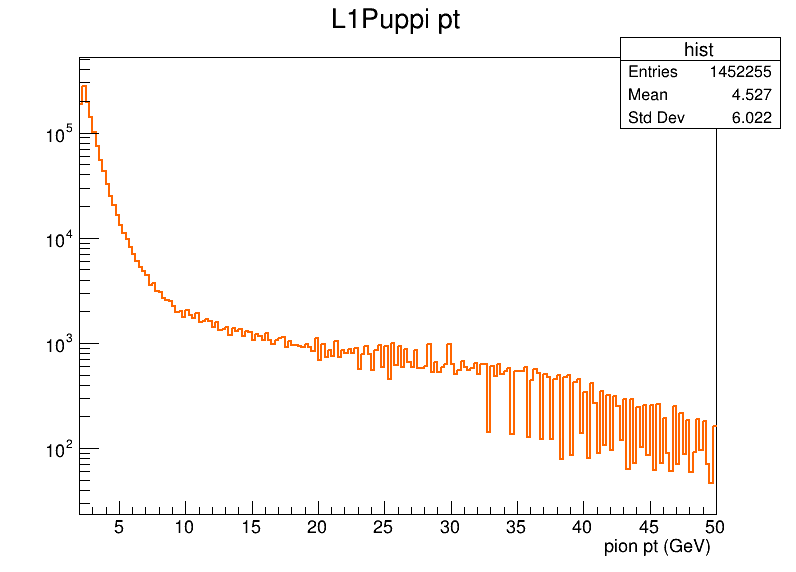

In [3]:
auto gen_pt   = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_pt").GetValue();
std::vector<float> pts;

for (const auto& pti : gen_pt) {
    pts.insert(pts.end(), pti.begin(), pti.end());
}

TH1F* hist_pt = new TH1F("hist", "L1Puppi pt; pion pt (GeV)", 192, 2, 50); //GeV
for (const auto &p : pts){
    if(p>0){
        hist_pt->Fill(p);
    }
}
hist_pt -> SetLineColor(kOrange+7);
hist_pt -> SetLineWidth(2);
// hist_pt -> Scale(N_lut/hist_pt-> Integral());
auto c1 = new TCanvas("c1", "c1", 800,600);
hist_pt->Draw();
c1->SetLogy();
c1->Draw();


## Building the pdf and the cdf

In [4]:
std::vector<double> pdf;
std::vector<double> cdf;
std::vector<float>  pt_bin;

for(int i=1; i < hist_pt -> GetNbinsX(); i++){
    pdf.push_back(hist_pt ->GetBinContent(i-1));
    pt_bin.push_back(hist_pt ->GetBinLowEdge(i));
}

cdf.push_back(pdf[0]);
for(int i=1; i < hist_pt -> GetNbinsX() -1; i++){
    cdf.push_back( (cdf[i-1]+pdf[i]) );
}
for(int i=0; i < hist_pt -> GetNbinsX(); i++){
    cdf[i] = cdf[i]/(*max_element(cdf.begin(), cdf.end()));
}

In [5]:
cdf.size()

(unsigned long) 191


## function to calculate the inverse cdf

In [6]:
float pt_generator(std::vector<double> cdf, std::vector<float> pt_bins, double p){
    int idx=0;
    for(int i=0; i < hist_pt -> GetNbinsX(); i++){
        if(p>=cdf[i] && p<=cdf[i+1]) idx=i;
    }
    return pt_bins[idx];
}

In [7]:
1.0 / 2047.0;


In [8]:
std::vector<float> probs;
std::vector<float> pt_LUT;
std::vector<int> pt_LUT_int;

float step = 1.0 / 2047.0;

for(float val=0; val<=1; val+=step ) probs.push_back(val);

std::cout << probs.size() << std::endl;
for(int i=0; i<probs.size(); i++){
    pt_LUT.push_back(pt_generator(cdf, pt_bin, probs[i]));
    pt_LUT_int.push_back(static_cast<int>(pt_LUT[i]/0.25));
}


2048


In [9]:
pt_LUT

(std::vector<float> &) { 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.000

### plot results using the generator
generate a random index for the LUT and save it

In [10]:
std::random_device rd;
std::mt19937 gen(rd());
std::uniform_int_distribution<int> uniform_dist(0, 4096);
// int i = uniform_dist(gen);

int N = 1.5e6;
std::vector<float> pt_gen;

for(int i=0; i<N; i++){
    int idx = uniform_dist(gen);
    pt_gen.push_back(pt_LUT[idx]);

}

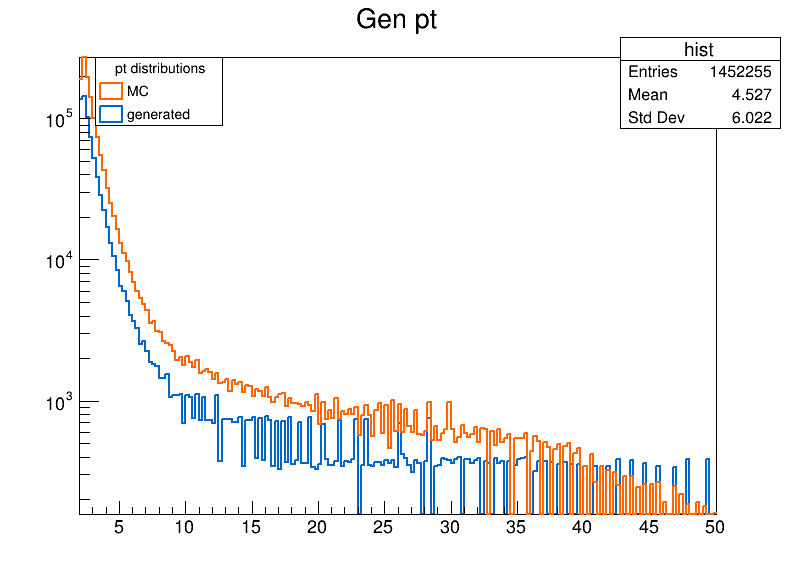

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [11]:
auto c1 = new TCanvas("c1", "c1", 800,600);

TH1F* hist_gen = new TH1F("hist", "Gen pt; ", 192, 2, 50 ); //GeV
for (const auto &p : pt_gen){
    hist_gen->Fill(p);
}

hist_gen -> SetLineColor(kAzure+2);
hist_gen -> SetLineWidth(2);

auto legend = new TLegend(0.12,0.78,0.28,0.9); // (x1, y1, x2, y2)
legend->SetHeader("pt distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_pt,  "MC", "f");
legend->AddEntry(hist_gen, "generated", "f");

hist_gen->Draw();
hist_pt->Draw("same");
c1->SetLogy();
legend->Draw();
c1->Draw();

Recall that we can't generate more than 2048 different pt values, from construction. we have max 2048 values in the LUT, i.e. of the $cdf^-1$

## $\eta$ generator
is a simple uniform number generation of $-2.4 < \eta < 2.4$, i.e. the acceptance of CMS

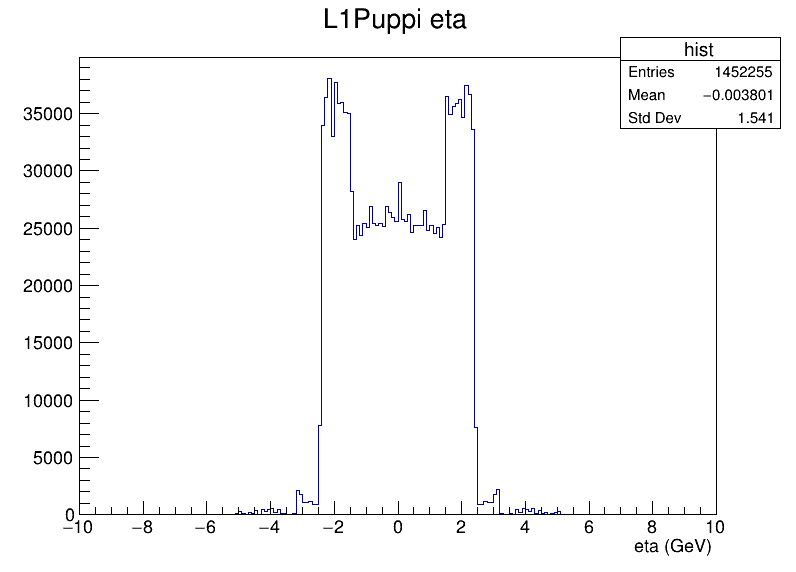

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [12]:
auto gen_eta   = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_eta").GetValue();
std::vector<double> etas;

for (const auto& etai : gen_eta) {
    etas.insert(etas.end(), etai.begin(), etai.end());
}

TH1F* hist_geneta = new TH1F("hist", "L1Puppi eta; eta (GeV)", 200, -10, 10); //GeV
for (const auto &e : etas){
    /*if(abs(e)<=2.4)*/ hist_geneta->Fill(e);
}

auto c1 = new TCanvas("c1", "c1", 800,600);

hist_geneta->Draw();
c1->Draw();

In [13]:
cout << "the max value of eta is:" << *max_element(etas.begin(),etas.end()) << endl;
cout << "the min value of eta is:" << *min_element(etas.begin(),etas.end()) << endl;

the max value of eta is:5.03125
the min value of eta is:-5.03125


In [14]:
int N = 1023;
std::vector<int> eta_gen;
float gran = ROOT::Math::Pi()/720;
// int int_eta = static_cast<int>(ph / gran) * gran
for(int i=0; i<N;i++){
    std::random_device rd;
    std::mt19937 gen(rd());
    std::uniform_real_distribution<float> uniform_dist(0.0, 1.0);
    float ph=(2*uniform_dist(gen)*2.4) - 2.4;
    eta_gen.push_back(static_cast<int>(ph / gran));
}
eta_gen

(std::vector<int> &) { -63, -45, 460, -5, 243, -227, 233, -50, 297, -140, 493, -5, 495, -517, 148, -355, -549, -494, -427, -306, -374, -486, -451, 91, 68, -227, 107, -344, -89, -518, 155, -463, -377, -45, 459, -13, -529, 307, 389, -131, -503, 234, -343, 283, -510, 292, -376, 310, 480, 548, -170, 256, -388, -108, 267, -226, -35, 481, -243, 265, 93, 359, -350, 466, -470, -267, 27, 489, 356, 270, -448, 425, 505, -197, -494, 47, -79, 513, -75, -58, 240, -395, -532, -281, 513, -438, -459, -97, -372, 481, 390, 204, -412, -369, 246, 155, -67, 474, 269, -58, -163, -177, -478, -387, 402, -481, 178, 82, 75, -513, 148, -435, 230, 281, 346, -149, -416, 438, -199, -10, -307, -69, -449, -16, -210, 462, -276, 124, -460, -108, -251, -339, 412, -24, 107, -35, 194, 404, -549, -267, -361, 27, 498, 395, 197, -355, 296, -306, 478, 225, 1, -537, -147, -440, -365, 446, -451, 536, 91, 0, 160, 345, 448, -121, 175, 381, -221, 253, 332, -8, -95, 194, 402, -416, -195, 525, 343, 159, -297, -123, 425, -339, -90, -2

In [15]:
cout << "max value of generated eta: " << *max_element(eta_gen.begin(), eta_gen.end()) * gran << endl;
cout << "min value of generated eta: " << *min_element(eta_gen.begin(), eta_gen.end()) * gran << endl;

max value of generated eta: 2.3911
min value of generated eta: -2.39546


## $\phi$ generator
same as $\eta$ but the interval is: $-\pi < \phi < \pi$

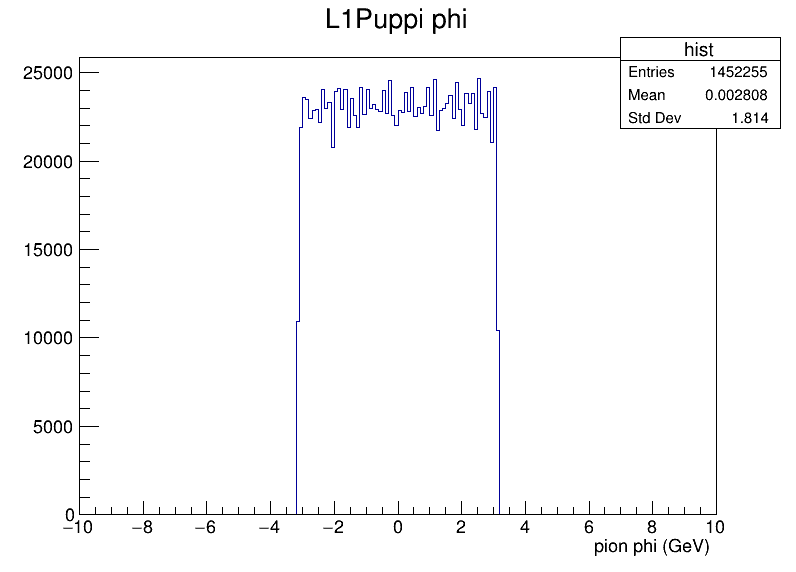

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [16]:
auto gen_phi   = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_phi").GetValue();
std::vector<double> phis;

for (const auto& phii : gen_phi) {
    phis.insert(phis.end(), phii.begin(), phii.end());
}

TH1F* hist_genphi = new TH1F("hist", "L1Puppi phi; pion phi (GeV)", 200, -10, 10); //GeV
for (const auto &e : phis){
    hist_genphi->Fill(e);
}
auto c1 = new TCanvas("c1", "c1", 800,600);
hist_genphi->Draw();
c1->Draw();

In [17]:
int N = 1023;
std::vector<int> phi_gen;
float gran = ROOT::Math::Pi()/720;
// int int_phi = static_cast<int>(ph / gran) * gran
for(int i=0; i<N;i++){
    std::random_device rd;
    std::mt19937 gen(rd());
    std::uniform_real_distribution<float> uniform_dist(0.0, 1.0);
    float ph=(2*uniform_dist(gen)*ROOT::Math::Pi()) - ROOT::Math::Pi();
    phi_gen.push_back(static_cast<int>(ph / gran));
}
phi_gen

(std::vector<int> &) { 86, -208, -551, -422, 236, 180, 300, 246, 223, -613, -85, 165, -369, -297, -330, 29, 136, -337, 693, -417, 535, -101, 223, -661, 653, -409, -60, 508, -78, -79, 604, 206, 40, -621, -589, 208, -144, -78, -199, -625, -361, -138, -255, 17, 442, -628, 395, 476, 192, 181, -689, 676, -393, 343, 170, -233, -414, 111, 689, 43, 569, 603, -113, 23, -216, 129, -140, -299, -522, 719, 174, -131, -41, -329, 107, -252, -301, -371, 389, 30, 459, -2, 316, -133, 306, 566, -657, -455, 10, 660, -277, -275, 86, 670, -2, -110, 3, 105, -75, 415, -579, 63, -542, 57, -294, -660, -85, 412, 449, 384, 427, 707, 421, 226, -562, -298, 197, 683, 11, 455, -443, 483, -73, -71, -228, 295, 165, 63, 73, 609, -557, -284, 91, -212, 407, 54, -145, -415, -663, -41, 46, -478, -171, 343, 385, -279, -9, -585, -516, -76, 479, -591, 421, -369, 73, 165, -468, -487, -701, 277, -290, -677, 479, 256, 254, 31, -667, 197, -469, 61, -605, -382, -105, 635, 186, -332, 575, -20, 93, 612, 299, 404, 609, 423, -311, -358

In [18]:
cout << *max_element(phi_gen.begin(), phi_gen.end()) * gran << endl;
cout << *min_element(phi_gen.begin(), phi_gen.end()) * gran << endl;

3.13723
-3.13723


## PID
generator based on the cdf, i.e. the frequentist probabilities of the type of particles

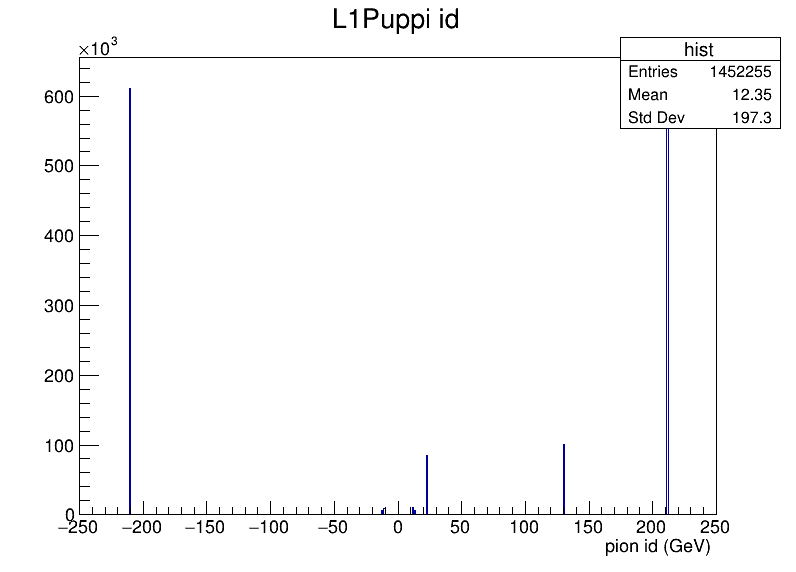

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [19]:
auto gen_id   = df.Take<ROOT::VecOps::RVec<Int_t>>("L1Puppi_pdgId").GetValue();
std::vector<double> ids;

for (const auto& idi : gen_id) {
    ids.insert(ids.end(), idi.begin(), idi.end());
}

TH1F* hist_genid = new TH1F("hist", "L1Puppi id; pion id (GeV)", 500, -250, 250); //GeV
for (const auto &id : ids){
    hist_genid->Fill(id);
}
auto c1 = new TCanvas("c1", "c1", 800,600);
hist_genid->Draw();
c1->Draw();

In [20]:
std::vector<int> photon; //22
std::vector<int> n_muon; std::vector<int> p_muon; //13
std::vector<int> electron; std::vector<int> positron; //11
std::vector<int> n_pion; std::vector<int> p_pion; //211
std::vector<int> neutral_pion; //130

for(int i=0; i<ids.size();i++){
    //pi+-
    if(ids[i]==(-211)) n_pion.push_back(i);
    if(ids[i]==211) p_pion.push_back(i);
    //e+-
    if(ids[i]==(-11))  electron.push_back(i);
    if(ids[i]==11)  positron.push_back(i);
    //mu+-
    if(ids[i]==(-13))  n_muon.push_back(i);
    if(ids[i]==13)  p_muon.push_back(i);
    //ph npi
    if(ids[i]==22)  photon.push_back(i);
    if(ids[i]==130) neutral_pion.push_back(i);
}

float N=ids.size();
float n_pi_frac  = (float)n_pion.size()/N;
float p_pi_frac  = (float)p_pion.size()/N;
float e_frac   = (float)electron.size()/N;
float p_frac   = (float)positron.size()/N;
float n_mu_frac  = (float)n_muon.size()/N;
float p_mu_frac  = (float)p_muon.size()/N;
float ph_frac  = (float)photon.size()/N;
float npi_frac = (float)neutral_pion.size()/N;

cout << "fraction of pion- :" << n_pi_frac << endl;
cout << "fraction of pion+ :" << p_pi_frac << endl;

cout << "fraction of muon- :" << n_mu_frac << endl;
cout << "fraction of muon+ :" << p_mu_frac << endl;
cout << "fraction of electron :" << e_frac << endl;
cout << "fraction of positron :" << p_frac << endl;
cout << "fraction of photon :" << (float)photon.size()/N << endl;
cout << "fraction of neutral_pion :" << (float)neutral_pion.size()/N << endl;

printf("\nprobailities * 1000, to put in the cdf (integer)\n");
cout << "fraction of pion :" << (n_pi_frac + p_pi_frac)*1000 << endl;
cout << "fraction of muon+ :" << (p_mu_frac+n_mu_frac)*1000 << endl;
cout << "fraction of electron :" << (e_frac+p_frac)*1000 << endl;
cout << "fraction of photon :" << (float)photon.size()/N *1000<< endl;
cout << "fraction of neutral_pion :" << (float)neutral_pion.size()/N *1000<< endl;

fraction of pion- :0.420582
fraction of pion+ :0.430078
fraction of muon- :0.00400825
fraction of muon+ :0.00408468
fraction of electron :0.00624753
fraction of positron :0.00686105
fraction of photon :0.0585283
fraction of neutral_pion :0.0696097

probailities * 1000, to put in the cdf (integer)
fraction of pion :850.661
fraction of muon+ :8.09293
fraction of electron :13.1086
fraction of photon :58.5283
fraction of neutral_pion :69.6097


In [21]:
std::vector<float> particle_prob;
particle_prob.push_back(n_pi_frac); particle_prob.push_back(p_pi_frac); particle_prob.push_back(p_mu_frac); particle_prob.push_back(n_mu_frac);
particle_prob.push_back(e_frac); particle_prob.push_back(p_frac); particle_prob.push_back(ph_frac); particle_prob.push_back(npi_frac);

// std::vector<float> cdf;
// cdf.push_back(n_pi_frac*1000);
// for(int k=1; k<8; k++){
//     cdf.push_back((cdf[k-1]+particle_prob[k] * 1000)  );
// }
// std::cout << "cdf of pid" << cdf;

In [22]:
int id_generator(float p, std::vector<float> particle_prob){    
    //input: prob[0,1] and particle_prob(pdf)

    std::vector<float> cdf;
    cdf.push_back(n_pi_frac);
    for(int k=1; k<8; k++){
        cdf.push_back(cdf[k-1]+particle_prob[k]);
    }
    int p_id_gen;
    if(p <= cdf[0]) p_id_gen= -211; // n_pion
    if(p>cdf[0] && p<= cdf[1]) p_id_gen = 211; // n_pion

    if(p>cdf[1] && p<= cdf[2]) p_id_gen = -13; 
    if(p>cdf[2] && p<= cdf[3]) p_id_gen = 13;

    if(p>cdf[3] && p<= cdf[4]) p_id_gen = -11; 
    if(p>cdf[4] && p<= cdf[5]) p_id_gen = 11; 

    if(p>cdf[5] && p<= cdf[6]) p_id_gen = 22; 
    if(p>cdf[6] && p<= cdf[7]) p_id_gen = 130; 

    return p_id_gen;
}

## Uniform random generator

In [23]:
class Xoshiro256ssRef {
  public:

    Xoshiro256ssRef() {}

    uint64_t rol64(uint64_t x, int k) { return (x << k) | (x >> (64 - k)); }

    uint64_t operator()(bool setseed, uint64_t seed) {
      uint64_t const result = rol64(state[1] * 5, 7) * 9;
      if (setseed) {
        state[0] = seed ^ 0x6b54c6575a2c794b;
        state[1] = rol64(seed, 13) ^ 0x514e9359bb2950cb;
        state[2] = rol64(seed, 27) ^ 0xc62c17550e3d1904;
        state[3] = rol64(seed, 42) ^ 0xf47e648fdd3da813;
      } else {
        uint64_t const t = state[1] << 17;
        state[2] ^= state[0];
        state[3] ^= state[1];
        state[1] ^= state[2];
        state[0] ^= state[3];
        state[2] ^= t;
        state[3] = rol64(state[3], 45);
      }
      return result;
    }

  private:
    uint64_t state[4] = { 0, 0, 0, 0 };
};


In [25]:
Xoshiro256ssRef X;
uint64_t n = X(true, 123456789);
cout << n << endl;

Xoshiro256ssRef rng;
uint64_t seed = 123456;
rng(true, seed);
// unsigned int random_number = rng(false, 0);
unsigned int random_number = rng(true, seed);
std::cout << "Numero casuale: " << random_number << std::endl;

for(int i=0;i<10;i++){
    unsigned int random_number = rng(false,0);
    std::cout << "Numero casuale: " << random_number << std::endl;
}

0
Numero casuale: 228186659
Numero casuale: 228186659
Numero casuale: 2164669990
Numero casuale: 3414007603
Numero casuale: 3528548462
Numero casuale: 2302826572
Numero casuale: 4175837934
Numero casuale: 899657388
Numero casuale: 2096624682
Numero casuale: 2533326211
Numero casuale: 3601906094
